# Análise de texto

### Passo 0: Instalar Bibliotecas pandas openpyxl wordcloud nltk

In [ ]:
#!pip install pandas openpyxl
#!pip install wordcloud
#!pip install nltk

### Passo 1: Preparação e Filtragem
Preparar o ambiente e os dados.

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
import re  # Importa o módulo de expressões regulares


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#?
caminho_arquivo = 'AnaliseComentario/lexico_v3.0.txt'
def carregar_op_lexicon_teste(caminho_arquivo):
    lexico = {}
    with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
        for i, linha in enumerate(arquivo):
            if i > 32214:  # Carregar apenas as primeiras 10 linhas para teste
                break
            partes = linha.strip().split(',')
            if len(partes) >= 3:
                palavra, _, polaridade, _ = partes
                lexico[palavra] = polaridade
    return lexico

op_lexicon_teste = carregar_op_lexicon_teste('lexico_v3.0.txt')
#op_lexicon_teste

In [79]:
# Carregar Base

df = pd.read_excel('Offboarding-Comentarios_202404.xlsx', engine='openpyxl')

#df = df[df["Questao"] == "E Nps Jornada"]

df = df[(df["Questao"] == "E Nps Jornada") | (df["Questao"] == "E Nps")]

df = df[df["sentimento"] == 0]
df


,id,Data da Resposta,Questao,Classificacao,Comentario,sentimento
4,2629808,01/11/2023,E Nps,-,"Ainda tem bugs, e algumas instabilidafes",0
5,2629808,01/11/2023,E Nps Jornada,Não favorável/Detrator,"A cultura da empresa mudou muito, a confiança ...",0
32,2630240,01/11/2023,E Nps,-,"tem melhorado a cada dia, agora já fornece ben...",0
47,2630309,01/11/2023,E Nps,-,Os produtos da Neon são muito acessíveis e eu ...,0
59,2630922,01/11/2023,E Nps,-,A persistência em desenvolver cada vez mais al...,0
...,...,...,...,...,...,...
790,3094181,18/04/2024,E Nps Jornada,Não favorável/Detrator,Muita coisa mudou desde 2023. É comum ver pess...,0
803,3121950,19/04/2024,E Nps,-,A Neon inova a cada dia e esta realmente preoc...,0
821,3167616,30/04/2024,E Nps,-,"A Neon possui pacotes basicos e bons, então re...",0
822,3167616,30/04/2024,E Nps Jornada,Não favorável/Detrator,"A neon tem excelente salário e benefícios, tra...",0


### Passo 2: Remoção de Stopwords

In [80]:
# Definindo stopwords em português e adicionando palavras personalizadas
stop_words = set(stopwords.words('portuguese')) | {'pro', 'pra', 'vi', 'Os'}

# Função para remover stopwords e caracteres não alfabéticos, mantendo caracteres especiais do português
def remove_stopwords(texto):
    # Verifica se o texto é uma string
    if not isinstance(texto, str):
        return ""
    # Utiliza expressão regular para remover caracteres não desejados, mantendo letras e caracteres especiais do português
    texto = re.sub(r'[^\w\s]', '', texto, flags=re.UNICODE)
    palavras = word_tokenize(texto.lower())
    return " ".join([palavra for palavra in palavras if palavra not in stop_words and palavra.isalpha()])


# Aplicando a remoção de stopwords antes do agrupamento
df['Motivos_sem_stopwords'] = df['Comentario'].apply(remove_stopwords)
df

,id,Data da Resposta,Questao,Classificacao,Comentario,sentimento,Motivos_sem_stopwords
4,2629808,01/11/2023,E Nps,-,"Ainda tem bugs, e algumas instabilidafes",0,ainda bugs algumas instabilidafes
5,2629808,01/11/2023,E Nps Jornada,Não favorável/Detrator,"A cultura da empresa mudou muito, a confiança ...",0,cultura empresa mudou confiança caiu
32,2630240,01/11/2023,E Nps,-,"tem melhorado a cada dia, agora já fornece ben...",0,melhorado cada dia agora fornece benefíciosfun...
47,2630309,01/11/2023,E Nps,-,Os produtos da Neon são muito acessíveis e eu ...,0,produtos neon acessíveis sempre recomendo todo...
59,2630922,01/11/2023,E Nps,-,A persistência em desenvolver cada vez mais al...,0,persistência desenvolver cada vez algo toda po...
...,...,...,...,...,...,...,...
790,3094181,18/04/2024,E Nps Jornada,Não favorável/Detrator,Muita coisa mudou desde 2023. É comum ver pess...,0,muita coisa mudou desde comum ver pessoas cris...
803,3121950,19/04/2024,E Nps,-,A Neon inova a cada dia e esta realmente preoc...,0,neon inova cada dia realmente preocupada cliente
821,3167616,30/04/2024,E Nps,-,"A Neon possui pacotes basicos e bons, então re...",0,neon possui pacotes basicos bons então recomen...
822,3167616,30/04/2024,E Nps Jornada,Não favorável/Detrator,"A neon tem excelente salário e benefícios, tra...",0,neon excelente salário benefícios trabalho rem...


### Passo 3: Mantendo apenas empresas com mais de 3 comentários (ignorar)

In [81]:
# Filtrar grupos com 3 ou mais ocorrências
df_filtrado = df.groupby('Questao').filter(lambda x: len(x) >= 3)

grupos = df_filtrado.groupby('Questao')

#df_filtrado

### Passo 4a: Análise do texto completo 
Para o arquivo completo, realizaremos as análises solicitadas.

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize  # Garanta que esta função seja importada
import re  # Importa o módulo de expressões regulares

In [82]:
# Exemplo de função de análise de sentimentos usando o OpLexicon
op_lexicon = carregar_op_lexicon_teste('lexico_v3.0.txt')


def analisar_sentimento_op_lexicon(texto):
    palavras = word_tokenize(texto.lower())
    score = 0
    for palavra in palavras:
        polaridade = op_lexicon.get(palavra, 'neutra')
        if polaridade == 'positiva':
            score += 1
        elif polaridade == 'negativa':
            score -= 1
    return score

# Suponha que df seja o seu DataFrame total
# Aplica a análise de sentimentos para cada 'Motivo' e calcula a média dos scores
scores = df['Motivos_sem_stopwords'].apply(analisar_sentimento_op_lexicon)
media_score = scores.mean()
print(f"Média de Score de Sentimento: {media_score}\n")


Média de Score de Sentimento: 0.0



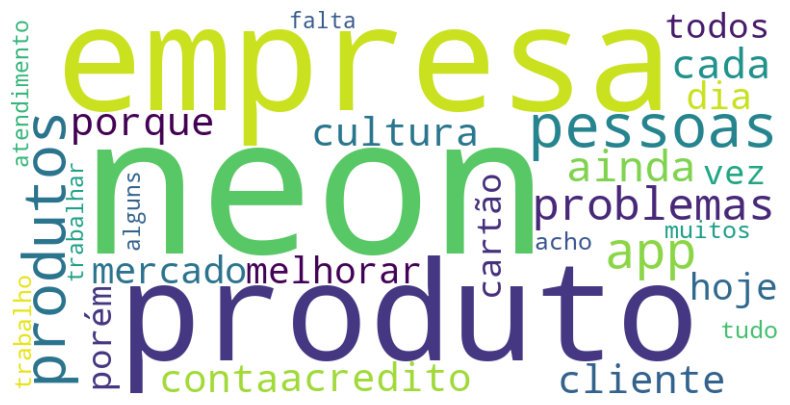

In [83]:
# Nuvem de palavras para texto sem stopwords
texto = ' '.join(df['Motivos_sem_stopwords'].tolist())
# Calcula a frequência das palavras e seleciona as top 30
palavras = texto.split()
contagem_palavras = Counter(palavras)
palavras_mais_comuns = contagem_palavras.most_common(30)
palavras_top_30 = dict(palavras_mais_comuns)  # Converte para dicionário para usar na WordCloud

# Geração da nuvem de palavras usando apenas as top 30 palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palavras_top_30)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [84]:


# 10 palavras mais comuns para texto sem stopwords
palavras = [palavra for frase in df['Motivos_sem_stopwords'] for palavra in frase.split()]
contagem_palavras = Counter(palavras)
mais_comuns = contagem_palavras.most_common(30)
print(f"10 Palavras Mais Comuns:\n{mais_comuns}\n")

# Seleção aleatória de 'Motivos' usando o texto original
motivos_aleatorios = df['Comentario'].sample(n=min(3, len(df)), replace=False).to_list()
print(f"Seleção aleatória de respostas:\n{motivos_aleatorios}\n")



10 Palavras Mais Comuns:
[('neon', 40), ('empresa', 21), ('produto', 19), ('pessoas', 18), ('produtos', 17), ('app', 13), ('problemas', 13), ('ainda', 12), ('cada', 11), ('cultura', 10), ('acredito', 10), ('cliente', 10), ('porque', 10), ('conta', 10), ('dia', 9), ('mercado', 9), ('melhorar', 9), ('hoje', 9), ('vez', 8), ('todos', 8), ('porém', 8), ('cartão', 8), ('muitos', 8), ('tudo', 8), ('acho', 8), ('trabalho', 8), ('alguns', 7), ('atendimento', 7), ('falta', 7), ('trabalhar', 7)]

Seleção aleatória de respostas:
['Com todo respeito do jeito que trata os funcionarios nao vai longe', 'Quando cheguei a neon era muito colaborativa, animada, com muito entusiasmo para a inovação dentro dos times. Aos poucos a empresa foi crescendo e amadurecendo, até ai normal, processos burocráticos aparecem e todos querem se proteger de qualquer coisa errada que afete o resultado. Porém o que mais me afetou foi a entrada de diversas lideranças sem o famoso "fit cultural" com avaliações de performance

In [85]:

# Análise hierárquica
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import pdist, squareform
from collections import Counter

def analise_hierarquica_de_agrupamentos_top_palavras(textos, top_n=30):
    # Vectoriza os textos para obter uma matriz de contagem de termos
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(textos)
    termos = vectorizer.get_feature_names_out()

    # Calcula a frequência total de cada termo e seleciona os top_n termos
    term_freq = np.asarray(X.sum(axis=0)).ravel()
    frequent_terms = [term for term, freq in sorted(zip(termos, term_freq), key=lambda x: x[1], reverse=True)[:top_n]]

    # Refaz a vetorização apenas com os termos mais frequentes
    vectorizer = CountVectorizer(vocabulary=frequent_terms)
    X_top = vectorizer.fit_transform(textos)

    # Calcula a matriz de distância de Jaccard entre os termos mais frequentes
    X_binary_top = (X_top.toarray() > 0).astype(int)
    distancias_top = pdist(X_binary_top.T, metric='jaccard')
    distancias_top = np.nan_to_num(distancias_top)

    # Cria o modelo de linkage para o agrupamento
    linkage_matrix = linkage(distancias_top, method='average')

    # Cria o dendrograma
    plt.figure(figsize=(15, 5))
    dendrogram(linkage_matrix, labels=vectorizer.get_feature_names_out(),
               leaf_rotation=90, leaf_font_size=12)
    plt.title("Dendrograma de Clustering Hierárquico das Top 30 Palavras")
    plt.xlabel("Palavras")
    plt.ylabel("Distância de Jaccard")
    plt.show()


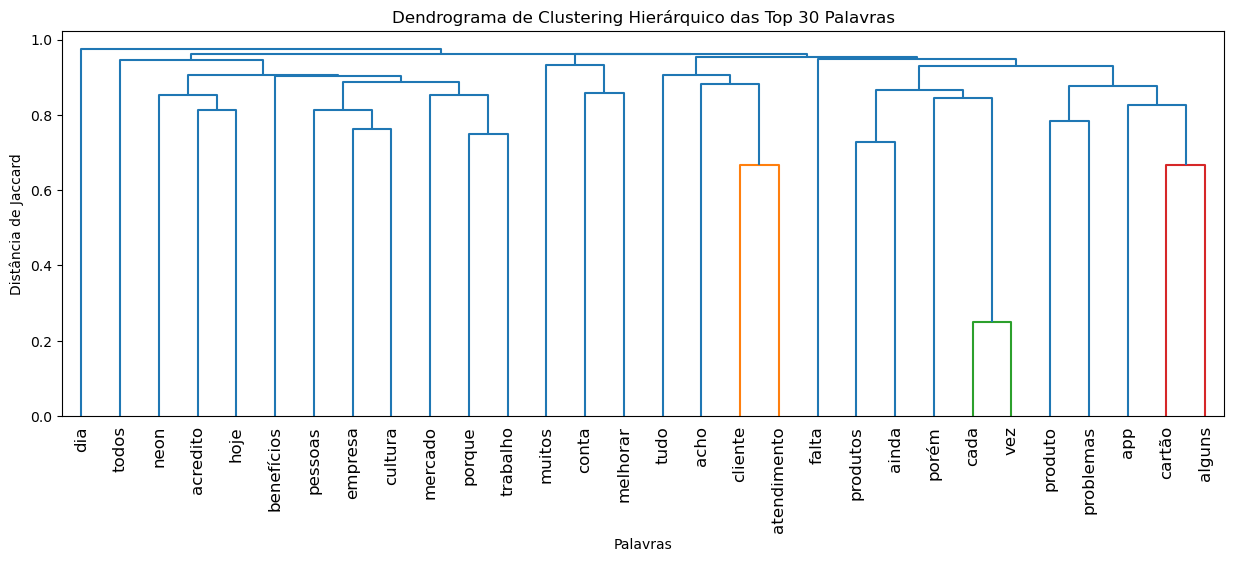

In [86]:

# DENDOGRAMA:
analise_hierarquica_de_agrupamentos_top_palavras(df['Motivos_sem_stopwords'].tolist())

### Passo 4b: Análise por Grupo
Para cada empresa restante, realizaremos as análises solicitadas.

In [108]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import random
import nltk
from nltk.tokenize import word_tokenize
import re  # Importa o módulo de expressões regulares
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np




In [109]:
def analisar_sentimento_op_lexicon(texto):
    palavras = word_tokenize(texto.lower())
    score = 0
    for palavra in palavras:
        polaridade = op_lexicon.get(palavra, 0)
        score += polaridade
    return score



In [ ]:
# Suponha que `grupos` seja um iterável de tuplas (nome_do_grupo, dataframe_grupo)
for nome, grupo in grupos:
    print(f"\nQuestao: {nome}\n{'=' * 60}")
    
    # Análise de sentimento e cálculo da média dos scores
    scores = grupo['Motivos_sem_stopwords'].apply(analisar_sentimento_op_lexicon)
    media_score = scores.mean()
    print(f"Média de Score de Sentimento: {str(media_score)}\n")
    


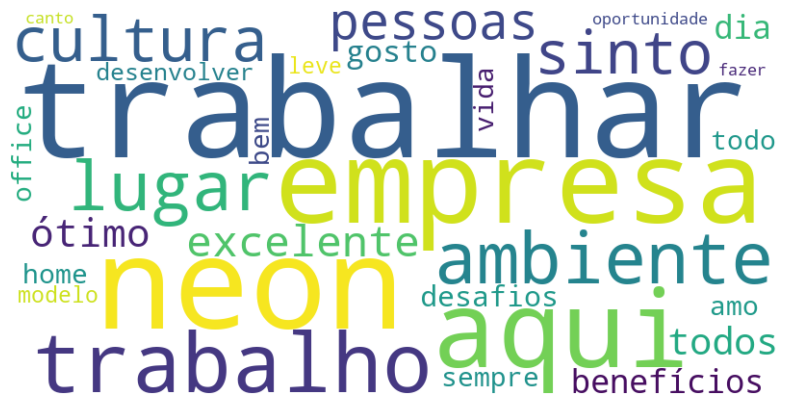

In [119]:
    # Preparação e geração da nuvem de palavras das top 30
    texto = ' '.join(grupo['Motivos_sem_stopwords'].tolist())
    palavras = texto.split()
    contagem_palavras = Counter(palavras)
    top_palavras = dict(contagem_palavras.most_common(30))
    if top_palavras:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_palavras)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print("Não há palavras suficientes para gerar uma nuvem de palavras.\n")


In [120]:

# Exibição das 10 palavras mais comuns
    mais_comuns = contagem_palavras.most_common(10)
    print(f"10 Palavras Mais Comuns:\n{mais_comuns}\n")


IndentationError: unexpected indent (4116825630.py, line 2)

In [121]:
    # Seleção aleatória de 'Motivos'
    motivos_aleatorios = grupo['Comentario'].sample(n=min(3, len(grupo)), replace=False).to_list()
    print(f"Seleção aleatória de respostas:\n{motivos_aleatorios}\n")



Seleção aleatória de respostas:
['Ótimo lugar pra trabalhar, aqui temos autonomia e podemos inovar.', 'Amo trabalhar aqui, a cultura, o time, as pessoas, a Neon em todo canto me encantam ', 'A Neon tem sido uma das melhores experiências profissionais que tive.']



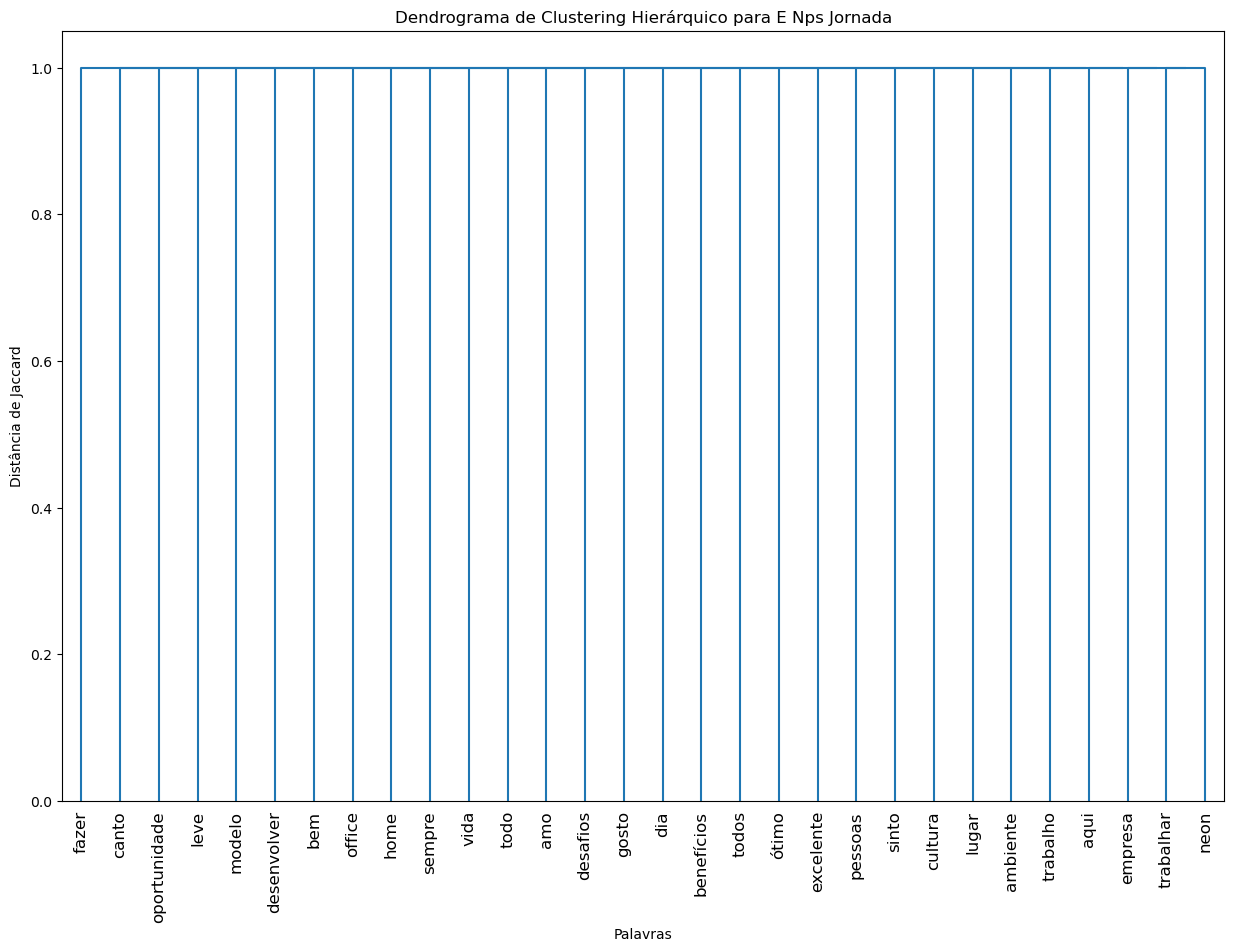


---



In [122]:
    # Clustering hierárquico das top 30 palavras
    if top_palavras:
        words = list(top_palavras.keys())
        vectorizer = CountVectorizer(vocabulary=words)
        X = vectorizer.fit_transform(texto.split()).toarray()
        X_binary = (X > 0).astype(int)
        distancias = pdist(X_binary.T, metric='jaccard')
        distancias = np.nan_to_num(distancias)
        linkage_matrix = linkage(distancias, method='average')
        plt.figure(figsize=(15, 10))
        dendrogram(linkage_matrix, labels=words, leaf_rotation=90, leaf_font_size=12)
        plt.title(f"Dendrograma de Clustering Hierárquico para {nome}")
        plt.xlabel("Palavras")
        plt.ylabel("Distância de Jaccard")
        plt.show()
    else:
        print("Não há palavras suficientes para realizar o clustering.\n")

    print("\n---\n")

### Rascunhos

import os
os.getcwd()

https://docs.google.com/spreadsheets/u/0/d/1u1_8ND_BY1DaGaQdu0ZRZPebrOaTJekE9hyw_7BAlzw/htmlview#

In [18]:
# Carregar apenas algumas linhas para teste e verificação
def carregar_op_lexicon_teste(caminho_arquivo):
    lexico = {}
    with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
        for i, linha in enumerate(arquivo):
            if i > 10:  # Carregar apenas as primeiras 10 linhas para teste
                break
            partes = linha.strip().split(',')
            if len(partes) >= 3:
                palavra, _, polaridade, _ = partes
                lexico[palavra] = polaridade
    return lexico
op_lexicon_teste = carregar_op_lexicon_teste('lexico_v3.0.txt')
#op_lexicon_teste = carregar_op_lexicon_teste('C:\\Users\\diego.geronimo\\experimentos_python_c\\planilha_empresas_toxicas\\lexico_v3.0.txt')
print(op_lexicon_teste)  # Imprime o léxico de teste para verificar se está correto

{'=[': '-1', '=@': '-1', '=p': '-1', '=P': '-1', '=x': '-1', '=d': '1', '=D': '1', ';)': '1', ';@': '-1', ';*': '-1'}


In [19]:
def analisar_sentimento_op_lexicon(texto, lexico):
    palavras = word_tokenize(texto.lower())
    score = 0
    palavras_encontradas = 0
    for palavra in palavras:
        polaridade = lexico.get(palavra)
        if polaridade == 'positiva':
            score += 1
            palavras_encontradas += 1
        elif polaridade == 'negativa':
            score -= 1
            palavras_encontradas += 1
    return score, palavras_encontradas

# Testar a função de análise com um exemplo conhecido
score_teste, palavras_encontradas_teste = analisar_sentimento_op_lexicon("péssimo droga ruim :( negativo", op_lexicon_teste)
print(f"Score teste: {score_teste}, Palavras encontradas: {palavras_encontradas_teste}")


Score teste: 0, Palavras encontradas: 0


In [20]:
import unidecode

# Adapte a função de remoção de stopwords para harmonizar o texto com o léxico
def remove_stopwords_e_acentos(texto):
    if not isinstance(texto, str):
        return ""
    # Removendo caracteres não alfabéticos e mantendo caracteres especiais do português
    texto = re.sub(r'[^\w\s]', '', texto, flags=re.UNICODE)
    palavras = word_tokenize(texto.lower())
    # Adicione a remoção ou manutenção de acentos conforme necessário aqui
    palavras_sem_acentos = [unidecode.unidecode(palavra) for palavra in palavras]
    return " ".join([palavra for palavra in palavras_sem_acentos if palavra not in stop_words and palavra.isalpha()])

# Exemplo de uso de unidecode para remover acentuação
# Isso é útil se o léxico não usar acentuação
texto_teste = "ação"
print(unidecode.unidecode(texto_teste))


acao


In [ ]:
#!pip install unidecode
#!pip install reportlab
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [24]:


# Suponha que `resultados` seja a sua lista de resultados
resultados = [('Empresa A', 0.5, 100), ('Empresa B', -0.2, 80), ('Empresa C', 0.1, 120)]  # Exemplo

# Caminho para salvar o PDF
caminho_pdf = 'analise_sentimentos_resultados.pdf'

# Criando o PDF
c = canvas.Canvas(caminho_pdf, pagesize=letter)
largura, altura = letter

# Definindo alguns parâmetros para o texto
c.setFont("Helvetica", 10)
linha_altura = 15
margem = 72
x = margem
y = altura - margem

# Escrevendo o cabeçalho
c.drawString(x, y, "Resultados da Análise de Sentimentos")
y -= linha_altura

# Escrevendo os resultados
for empresa, score, palavras in resultados:
    texto = f"Empresa: {empresa}, Score Médio: {score}, Palavras Encontradas: {palavras}"
    if y < margem:  # Se chegou no fim da página, crie uma nova página
        c.showPage()
        c.setFont("Helvetica", 10)
        y = altura - margem
    c.drawString(x, y, texto)
    y -= linha_altura

# Salvando o PDF
c.save()

print(f"PDF gerado com sucesso: {caminho_pdf}")


PDF gerado com sucesso: analise_sentimentos_resultados.pdf


In [25]:
def carregar_op_lexicon(caminho_arquivo):
    lexico = {}
    with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
        for linha in arquivo:
            partes = linha.strip().split(',')
            # Verifica se há exatamente 4 partes por linha
            if len(partes) == 4:
                palavra, categoria, polaridade_str, tipo = partes
                # Converte a polaridade para inteiro
                try:
                    polaridade = int(polaridade_str)
                except ValueError:
                    continue  # Ignora a linha se a polaridade não for um número
                # Mapeia polaridade para valores específicos
                if polaridade > 0:
                    lexico[palavra] = 1  # Positiva
                elif polaridade < 0:
                    lexico[palavra] = -1  # Negativa
                else:
                    lexico[palavra] = 0  # Neutra
    return lexico

# Exemplo de como carregar o léxico
op_lexicon = carregar_op_lexicon_teste('lexico_v3.0.txt')


op_lexicon

{'=[': '-1',
 '=@': '-1',
 '=p': '-1',
 '=P': '-1',
 '=x': '-1',
 '=d': '1',
 '=D': '1',
 ';)': '1',
 ';@': '-1',
 ';*': '-1'}

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import re
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib.backends.backend_pdf import PdfPages


def analisar_sentimento_op_lexicon(texto):
    palavras = word_tokenize(texto.lower())
    score = 0
    for palavra in palavras:
        polaridade = op_lexicon.get(palavra, 0)
        score += polaridade
    return score

# Supondo que `grupos` seja um iterável de tuplas (nome_do_grupo, dataframe_grupo)
with PdfPages('analise_empresas.pdf') as pdf:
    for nome, grupo in grupos:
        fig, axs = plt.subplots(3, 1, figsize=(8, 18))  # Configura 3 subplots em uma coluna

        # Texto com análises básicas
        text_str = f"Empresa: {nome}\n\n"
        scores = grupo['Motivos_sem_stopwords'].apply(analisar_sentimento_op_lexicon)
        media_score = scores.mean()
        text_str += f"Média de Score de Sentimento: {media_score:.2f}\n\n"
        texto = ' '.join(grupo['Motivos_sem_stopwords'].tolist())
        palavras = texto.split()
        contagem_palavras = Counter(palavras)
        top_palavras = dict(contagem_palavras.most_common(10))
        text_str += f"10 Palavras Mais Comuns: {', '.join([f'{k}: {v}' for k, v in top_palavras.items()])}\n"
        axs[0].text(0.01, 0.5, text_str, fontsize=12, verticalalignment='center')
        axs[0].axis('off')

        # Nuvem de palavras das top 30
        top_palavras_30 = dict(contagem_palavras.most_common(30))
        if top_palavras_30:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_palavras_30)
            axs[1].imshow(wordcloud, interpolation='bilinear')
        axs[1].axis('off')
        axs[1].set_title('Nuvem de Palavras')

        # Clustering hierárquico das top 30 palavras
        if top_palavras_30:
            words = list(top_palavras_30.keys())
            vectorizer = CountVectorizer(vocabulary=words)
            X = vectorizer.fit_transform(texto.split()).toarray()
            X_binary = (X > 0).astype(int)
            distancias = pdist(X_binary.T, metric='jaccard')
            distancias = np.nan_to_num(distancias)
            linkage_matrix = linkage(distancias, method='average')
            dendrogram(linkage_matrix, labels=words, leaf_rotation=90, leaf_font_size=12, ax=axs[2])
            axs[2].set_title('Dendrograma de Clustering Hierárquico')
        else:
            axs[2].text(0.5, 0.5, "Insuficiente para clustering", horizontalalignment='center', verticalalignment='center')
            axs[2].axis('off')

        plt.tight_layout(pad=2.0)
        pdf.savefig(fig)  # Salva a página no PDF
        plt.close(fig)

print("Análise concluída e resultados salvos em 'analise_empresas.pdf'.")


Análise concluída e resultados salvos em 'analise_empresas.pdf'.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import random
import nltk
import re  # Importa o módulo de expressões regulares

# Exemplo de função de análise de sentimentos usando o OpLexicon
def analisar_sentimento_op_lexicon(texto):
    palavras = word_tokenize(texto.lower())
    score = 0
    for palavra in palavras:
        polaridade = op_lexicon.get(palavra, 'neutra')
        if polaridade == 'positiva':
            score += 1
        elif polaridade == 'negativa':
            score -= 1
    return score

# Adaptação no loop de análise
for nome, grupo in grupos:
    print(f"\nEmpresa: {nome}\n{'=' * 60}")
    
    # Aplica a análise de sentimentos para cada 'Motivo' e calcula a média dos scores
    scores = grupo['Motivos_sem_stopwords'].apply(analisar_sentimento_op_lexicon)
    media_score = scores.mean()
    print(f"Média de Score de Sentimento: {media_score}\n")
    
    # Nuvem de palavras para texto sem stopwords
    texto = ' '.join(grupo['Motivos_sem_stopwords'].tolist())
    if any(c.isalpha() for c in texto):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print("Não há palavras suficientes para gerar uma nuvem de palavras após filtrar stopwords.\n")

    # 10 palavras mais comuns para texto sem stopwords
    palavras = [palavra for frase in grupo['Motivos_sem_stopwords'] for palavra in frase.split()]
    contagem_palavras = Counter(palavras)
    mais_comuns = contagem_palavras.most_common(10)
    print(f"10 Palavras Mais Comuns:\n{mais_comuns}\n")
    
    # Seleção aleatória de 'Motivos' usando o texto original
    motivos_aleatorios = grupo['Motivos'].sample(n=min(3, len(grupo)), replace=False).to_list()
    print(f"Seleção aleatória de respostas:\n{motivos_aleatorios}\n")
    print("\n---\n")